In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
cd /content/drive/MyDrive/kaggle_study/house_prices

/content/drive/MyDrive/kaggle_study/house_prices


## Part 0. imports, settings, data load

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [142]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## Part 1. Exploratory Data Analysis(EDA)
1. 데이터에 얼마나 많은 행과 열이 존재하는지 확인하기(데이터 확인 작업)
2. 특징들의 이름은 무엇이고, 의미하는 바가 무엇인지 확인하기
3. 특징(변수)들의 유형이 무엇인지?(numberical, categorical ... )
4. target 피쳐에 대한 탐구
4. 결측값의 수치와 어떻게 처리할 건지
5. 이상치 탐색과 어떻게 처리할 건지
6. 비대칭도(Skewness) 확인
7. visualization(matplotlib, seaborn)
8. 모든 feature들과 target(SalePrice)와의 상관관계 알아보기(현재 feature가 많은 관계로 모든 feature를 써야할까 ? 생각해보기 안쓴다면 어떤 기준으로 나눠야 할까 생각하고 적용해보기) -> heatmap 으로 표시
9. features 중에서 numberical(Correlation Heat Map, Zoomed Heat Map, Pair Plot, Scatter Plot 사용해봐도 좋음 )/categorical(변수 값과 관련하여 target과의 분포확인, Box Plot) 데이터 탐색하기
10. **심화과정** 파생 변수 생성해보기
11. **심화과정** box-cox 변환해보기

In [143]:
# 맨 처음데이터 5개 확인(head 파라미터로 개수를 지정 가능)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [145]:
# shape : (데이터 수, feature 수)
print("train shape : ", df_train.shape)
print("test shape : ", df_test.shape)

train shape :  (1460, 81)
test shape :  (1459, 80)


In [146]:
# info : 각 feature들에 대한 대략적인 정보 파악(columns name, not null count, type)
print("train info : ", df_train.info())
print("**" * 50)
print("test info : ", df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## - features meaning(간단하게 파악하고 feature drop 작업 시 의미 파악 한번 더 하기)
MSSubClass : 매매와 관련된 주거 타입 식별  
MSZoning : 매매의 일반적인 지역 분류  
LotFrontage : 부동산과 연결된 도로의 선형 피트  
LotArea : 평방피트 단위의 부지 크기  
Street : 부동산으로의 도로(street) 접근 유형  
Alley : 부동산으로의 골목(alley) 접근 유형  
LotShape : 부동산의 일반적인 모양  
LandContour : 부동산의 평탄도  
Utilities : 사용 가능한 유틸리티(수도전기가스) 유형  
LotConfig : 지역 구성  
LandSlope : 부동산의 경사  
Neighborhood : 에임스 시 경계 내의 물리적인 위치  
Condition1 : 주요 도로 및 철도와의 근접성  
Condition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)  
BldgType : 주거 유형  
HouseStyle : 주거 스타일  
OverallQual : 전체적인 재료 및 마감 등급  
OverallCond : 집의 전체적인 상태 등급  
YearBuilt : 원래 공사일  
YearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)  
RoofStyle : 지붕 유형  
RoofMatl : 지붕 재료  
Exterior 1st : 주택 외장재  
Exterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)  
MasVnrType : 벽돌 베니어 유형  
MasVnrArea : 벽돌 베니어 면적 (평방피트)  
ExterQual : 외장재 품질  
ExterCond : 외장재 현재 상태  
Foundation : 토대 유형  
BsmtQual : 지하의 높이 평가  
BsmtCond : 지하실 일반적인 상태 평가  
BsmtExposure : 워크아웃 혹은 정원 수준의 벽  
BsmtFinType1 : 지하 마감면의 품질  
BsmtSF1 : 유형 1 마감 평방피트  
BsmtFinType2 : 지하 마감면의 품질 (있는 경우)  
BsmtSF2 : 유형 2 마감 평방피트  
BsmtUnfSF : 마감되지 않은 지하실 면적  
TotalBsmtSF : 지하 총 평방피트  
Heating : 난방 유형  
HeatingQC : 난방 품질 및 상태  
CentralAir : 중앙 에어컨 여부  
Electrial : 전기 시스템  
1stFlrSF : 1층 평방피트  
2ndFlrSF : 2층 평방피트  
LowQualFinSF : 저품질 마감 평방 피트 (모든 층)  
GrLivArea : 지상 거실 면적 평방 피트  
BsmtFullBath : 지하 전체 욕실  
BsmtHalfBath : 지하 반 욕실  
FullBath : 지하층 위의 전체 욕실  
HalfBath : 지하층 위의 반 욕실  
Bedroom : 지하층 위의 침실 수 (지하 침실은 포함하지 않음)  
Kitchen : 지하층 위의 주방 수  
KitchenQual : 주방 품질  
TotRmsAbvGra : 지하층 위의 모든 방 (욕실 제외)  
Functional : 집 기능 (공제가 보장되지 않는 한 일반적인 경우 가정)  
FirePlace : 벽난로 수  
FireplaceQu : 벽난로 품질  
GarageType : 차고 위치  
GarageYrBlt : 차고 건설 연도  
GarageFinish : 차고 내부 마감  
GarageCars : 차량 수용 가능 차고 크기  
GarageArea : 차고 평방피트  
GarageQual : 차고 품질  
GarageCond : 차고 상태  
PavedDrive : 포장된 진입로  
WoodDeckSF : 평방피트 단위의 목재 데크 면적  
OpenPochSF : 평방피트 단위의 개방 현관 면적  
EnclosedPorch : 평방피트 단위의 닫힌 현관 면적  
3SnPorch : 평방 피트의 세 계절 현관 면적  
ScreenPorch : 평방피트 단위의 스크린 현관 면적  
PoolArea : 평방피트 단위의 수영장 면적  
PoolQC : 수영장 품질  
Fence : 울타리 품질  
MiscFeature : 다른 항목에서 다루지 않는 기타 특징  
MiscVal : 기타 특징의 가치  
MoSold : 월 판매  
YrSold : 연 판매  
SaleType : 판매 유형  
SaleCondition : 판매 상태  

In [147]:
# 중복된 데이터는 없음
df_train.duplicated().sum()

0

In [148]:
# 수치형 피쳐들에 대한 값에 분포 표시 - nan 값 무시
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [149]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [150]:
df_train['HouseAge'] = datetime.today().year - df_train['YearBuilt']
df_train.drop('YearBuilt', axis = 1, inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,23
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,44
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,81
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,72


In [151]:
df_train['HouseRemodAge'] = datetime.today().year - df_train['YearRemodAdd']
df_train.drop('YearRemodAdd', axis = 1, inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,19,19
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,46,46
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,21,20
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,52
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,23,22
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,44,34
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,81,16
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,72,26


In [152]:
df_train['GarageAge'] = datetime.today().year - df_train['GarageYrBlt']
df_train.drop('GarageYrBlt', axis = 1, inplace=True)
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodAge,GarageAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,19,19,19.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,46,46,46.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,21,20,21.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,107,52,24.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,22,22,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2007,WD,Normal,175000,23,22,23.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2010,WD,Normal,210000,44,34,44.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,81,16,81.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2010,WD,Normal,142125,72,26,72.0


In [153]:
# 1stFlrSF + TotalBsmtSF= 1stBsSF(1층 피트 + 지하 피트)
df_train['1stBsSF'] = df_train['1stFlrSF'] + df_train['TotalBsmtSF'] 
df_train.drop('1stFlrSF', axis = 1, inplace=True)
df_train.drop('TotalBsmtSF', axis = 1, inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodAge,GarageAge,1stBsSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,19,19,19.0,1712
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,46,46,46.0,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,21,20,21.0,1840
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,107,52,24.0,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,22,22,22.0,2290


In [154]:
# GarageAge + HouseAge = HouseGarageAge
df_train['HouseGarageAge'] = df_train['GarageAge'] + df_train['HouseAge'] 
df_train.drop('GarageAge', axis = 1, inplace=True)
df_train.drop('HouseAge', axis = 1, inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseRemodAge,1stBsSF,HouseGarageAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,19,1712,38.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,46,2524,92.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,20,1840,42.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,52,1717,131.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,22,2290,44.0


In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           91 non-null     object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   Utilities       1460 non-null   object 
 10  LotConfig       1460 non-null   object 
 11  LandSlope       1460 non-null   object 
 12  Neighborhood    1460 non-null   object 
 13  Condition1      1460 non-null   object 
 14  Condition2      1460 non-null   object 
 15  BldgType        1460 non-null   object 
 16  HouseStyle      1460 non-null   object 
 17  OverallQual     1460 non-null   i

In [156]:
df_train['BsmtFullBath']

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: int64

### 타켓 변수 : SalePrice 분포 확인(왜도(shewness), 첨도(kurtosis) 확인)

왜도 - 분포가 정규분포에 비해서 얼마나 비대칭인지 나타내는 척도(절대값3미만 정도의 치우침은 왜도가 크지 않다고 판단)  
첨도 - 샘플의 점수가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족한 모양 첨도가 커진다.(절대값 7미만)  
관련 자료 : https://m.blog.naver.com/yk60park/222100758577

Skewness : 1.882876
Kurtosis : 6.536282


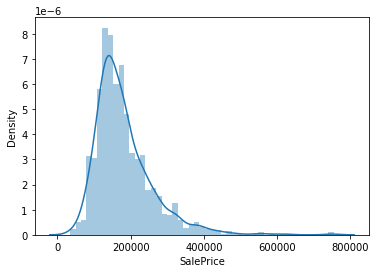

In [157]:
sns.distplot(df_train['SalePrice'])

print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

SalePrice 타켓 변수는 데이터가 골고루 분포되지 않은 것을 볼 수 있다.(정규성을 띄고 있지 않다)  
ML regression 성능을 악화시킬 영향이 있기 때문에 정규분포 형태로 만들어주자.  
log tansformation 사용  
관련 자료 : https://leebaro.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C-%EC%8B%9D%EC%97%90-%EB%A1%9C%EA%B7%B8%EB%A5%BC-%EC%B7%A8%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0  
(log 변환이 성능에 큰 영향을 끼칠까? : 읽어볼만 한 논문 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/) -> 어렵다면 summary만 읽어봐도 좋다!  
(통계 용어로 멱변환이라기도 하고 박스칵스 변환을 알아보자)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

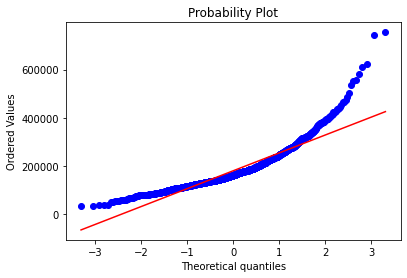

In [158]:
stats.probplot(df_train['SalePrice'], plot=plt)

Skewness : 0.121347
Kurtosis : 0.809519


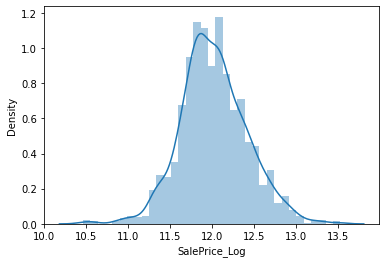

In [159]:
df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log'])

print("Skewness : %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis : %f" % df_train['SalePrice_Log'].kurt())

df_train.drop('SalePrice', axis= 1, inplace=True)

log 변환을 위해서 np.log1p를 사용하는 것을 볼 수 있는데, np.log와 np.log1p의 차이점을 알아야 한다.  
관련 자료 : https://suppppppp.github.io/posts/Why-Series-MDM-1/

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826702))

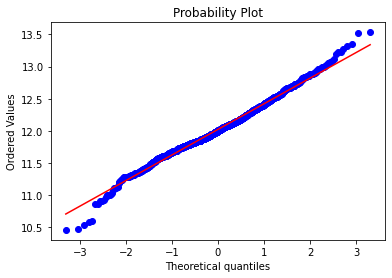

In [160]:
stats.probplot(df_train['SalePrice_Log'], plot=plt)

데이터가 정규성을 잘 따르고 있는 것을 볼 수 있다.

In [161]:
# for col in numerical_features.index:
#   print('{:15}'.format(col), 
#           'Skewness: {:05.2f}'.format(df_train[col].skew()) ,
#           '   ' ,
#           'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
#          )

In [162]:
# 수치형 피쳐와 카테고리형 피쳐가 얼마나 있고, 편의상 사용을 위하여 변수에 저장한다.
numerical_features = df_train.dtypes[df_train.dtypes != "object"]
print(f"수치형 변수 개수: {len(numerical_features.index)}개,\n수치형 변수: {numerical_features.index}")
print("--" * 50)
categorical_features = df_train.dtypes[df_train.dtypes == "object"]
print(f"범주형 변수 개수: {len(categorical_features.index)}개,\n범주형 변수: {categorical_features.index}")

수치형 변수 개수: 36개,
수치형 변수: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'HouseRemodAge', '1stBsSF', 'HouseGarageAge',
       'SalePrice_Log'],
      dtype='object')
----------------------------------------------------------------------------------------------------
범주형 변수 개수: 43개,
범주형 변수: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual

SalePrice는 log transformation으로 정규 분포형태로 안정화를 시켰지만, 위 결과를 보면 다른 피처들 중에 많이 왜곡되어 있는 피처들이 존재한다. (ex, LotArea, MiscVal, MoSold ... )  
이후에 결측값/이상치 제거하고 수치형 변수들에 대한 상관관계와 데이터 plot을 확인한 후 판단하여 여전히 왜곡된 피처들이라면 각각의 피처들에 대하여 log transformation 실행하자

범주형 데이터에 대한 처리는 ? -> 의미 파악 하기 힘들다 -> 그러면 어떻게 ? -> 더미 변수, one-hot encoding, label encoder, embedding 등등  
관련 자료 : https://datascienceschool.net/03%20machine%20learning/02.02%20%EB%B2%94%EC%A3%BC%ED%98%95%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html



### 이상치 탐색

이상치 탐색과 처리도 여러 가지 방법이 있겠지만, 필자가 생각하는 좋은 방법은 모든 피처들에 대한 plot(Box plot, 산점도 등)를 그려서 이상치를 보고 직접 제거하면 좋지만, 해당 프로젝트는 피처들의 개수가 많기 때문에 편리하게 이상치를 제거할 수 있는 IQR를 사용한다.

참고 자료 : IQR - https://hong-yp-ml-records.tistory.com/15

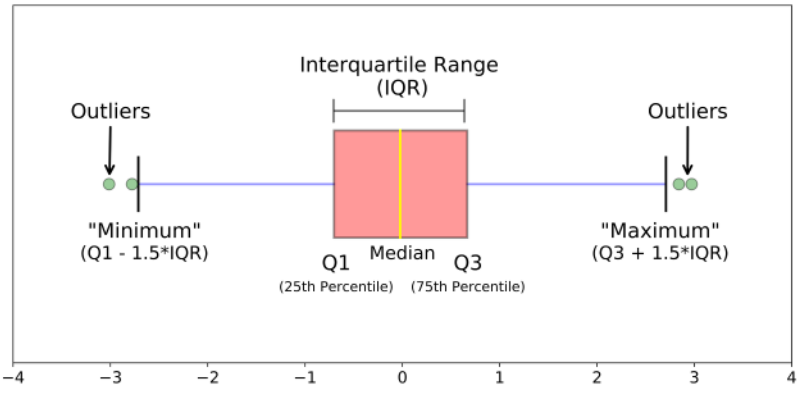

In [163]:
# df_train = df_train.drop(
#     df_train[(df_train['OverallQual']==10) & (df_train['SalePrice_Log']<12.3)].index)

In [164]:
# df_train = df_train.drop(
#     df_train[(df_train['GrLivArea_Log']>8.3) & (df_train['SalePrice_Log']<12.5)].index)

In [165]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

In [167]:
Outliers = detect_outliers(df_train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', '1stBsSF', 'HouseGarageAge',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'HouseRemodAge', 'HouseGarageAge'])

In [168]:
df_train.loc[Outliers]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseRemodAge,1stBsSF,HouseGarageAge,SalePrice_Log
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2009,New,Partial,14,1472,NaN,11.635152
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,11,2007,WD,Normal,24,2474,234.0,11.804856
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,40,1040,NaN,11.344519
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,23,1452,NaN,11.755879
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,35,2128,70.0,12.384223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,Shed,600,6,2010,WD,Normal,42,2112,84.0,11.877576
897,898,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2009,WD,Alloca,43,1120,86.0,11.870278
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,1,2010,WD,Normal,62,2210,124.0,11.946661
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,12,2009,WD,Normal,57,2372,167.0,11.585255


In [169]:
df_train = df_train.drop(Outliers, axis = 0).reset_index(drop=True)
df_train.shape

(1347, 79)

### 결측치 확인
결측치가 높은 순으로 내림차순 정렬해서 표시

In [170]:
total = df_train.isnull().sum().sort_values(ascending=False)
total 

PoolQC           1345
MiscFeature      1308
Alley            1266
Fence            1091
FireplaceQu       651
                 ... 
CentralAir          0
MSSubClass          0
2ndFlrSF            0
LowQualFinSF        0
SalePrice_Log       0
Length: 79, dtype: int64

In [171]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1345,0.998515
MiscFeature,1308,0.971047
Alley,1266,0.939866
Fence,1091,0.809948
FireplaceQu,651,0.483296
LotFrontage,229,0.170007
GarageCond,68,0.050483
HouseGarageAge,68,0.050483
GarageType,68,0.050483
GarageFinish,68,0.050483


결측치가 많은 피처들은 어떻게 해야할까?   
여러 가지 많은 방법들이 있지만, 이 데이터셋에서 NaN의 의미를 파악해보면 마냥 결측 값이라는 의미가 아닌 피처들이 있다는 것을 발견할 수 있다.  
무슨 말이냐고 하면 예를 들면, 아래 사진에서 볼 수 있는데 PoolQC는 풀장의 퀄리트에 대한 피처인데 여기서 NaN은 결측값이 아닌 풀장이 없다는 의미이다. 즉, 의미가 없는 결측값이 아닌 "없다"라는 의미인 NaN이다. (Fence도 마찬가지)  
해결방법 : 결측값을 의미하는 NaN이 아닌 없다라는 의미를 가진 None으로 대체하자!


관련 자료 : 결측 값 대체 - https://gooopy.tistory.com/44

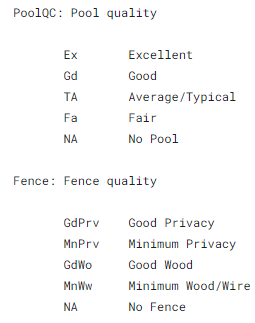

In [172]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
  df_train[col].fillna('None', inplace=True)
  df_test[col].fillna('None', inplace=True)

In [173]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,229,0.170007
HouseGarageAge,68,0.050483
MasVnrArea,7,0.005197
Id,0,0.000000
Functional,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
GarageFinish,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


위 피처들은 진짜 결측값을 의미한다.   
간단하게 평균값으로 대체하자.

In [174]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [175]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Id,0,0.0
TotRmsAbvGrd,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
GarageFinish,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
KitchenQual,0,0.0


In [176]:
print("df_train : " ,df_train.isnull().sum().sum())
print("df_test : ", df_test.isnull().sum().sum())

df_train :  0
df_test :  0


In [177]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseRemodAge,1stBsSF,HouseGarageAge,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,19,1712,38.0,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,46,2524,92.0,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,20,1840,42.0,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,52,1717,131.0,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,22,2290,44.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,None,0,8,2007,WD,Normal,22,1906,46.0,12.072547
1343,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2010,WD,Normal,34,3615,88.0,12.254868
1344,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,16,2340,162.0,12.493133
1345,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,None,0,4,2010,WD,Normal,26,2156,144.0,11.864469


### numerical_features와 categorical_feature 살펴보기

In [178]:
# 수치형 피쳐와 카테고리형 피쳐가 얼마나 있고, 편의상 사용을 위하여 변수에 저장한다.
numerical_features = df_train.dtypes[df_train.dtypes != "object"]
print(f"수치형 변수 개수: {len(numerical_features.index)}개,\n수치형 변수: {numerical_features.index}")
print("--" * 50)
categorical_features = df_train.dtypes[df_train.dtypes == "object"]
print(f"범주형 변수 개수: {len(categorical_features.index)}개,\n범주형 변수: {categorical_features.index}")

수치형 변수 개수: 36개,
수치형 변수: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'HouseRemodAge', '1stBsSF', 'HouseGarageAge',
       'SalePrice_Log'],
      dtype='object')
----------------------------------------------------------------------------------------------------
범주형 변수 개수: 43개,
범주형 변수: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual

In [179]:
df_train[numerical_features.index].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseRemodAge,1stBsSF,HouseGarageAge,SalePrice_Log
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,0,2,2008,19,1712,38.0,12.247699
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,0,5,2007,46,2524,92.0,12.109016
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,0,9,2008,20,1840,42.0,12.317171
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,0,0,2,2006,52,1717,131.0,11.849405
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,0,12,2008,22,2290,44.0,12.429220


In [180]:
df_train[categorical_features.index].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


#### 수치형 변수 확인

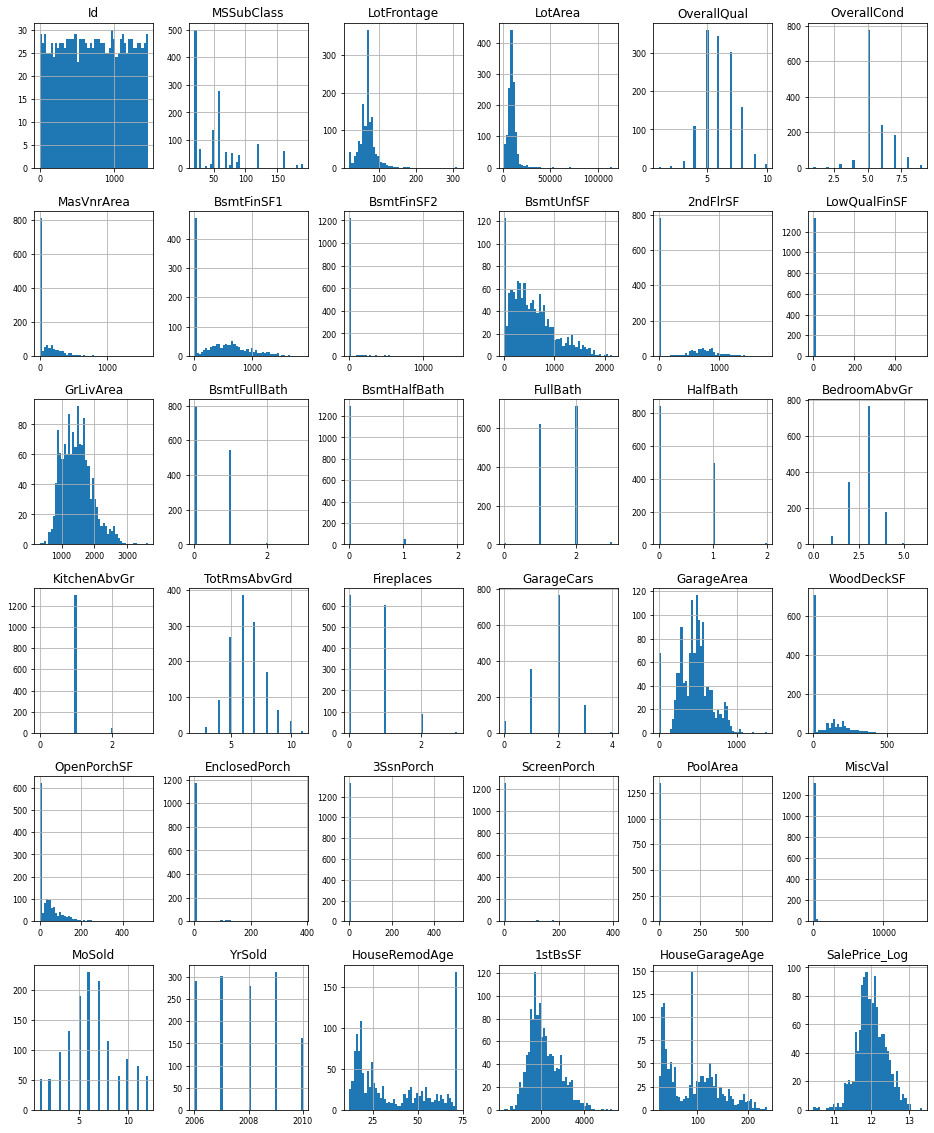

In [193]:
df_train[numerical_features.index].hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.show()

위 결과를 보고 도출해낼 수 있는 insight
1. Target 변수인 SalePrice와 유사한 분포를 가진 피처들이 존재한다 -> 그 의미는 ? -> 서로 상관관계가 높은 것이 아닐까 유추할 수 있다.(확신 x, 후에 correlation heatmap에서 확인하자)
2. value가 0인 피처들이 많다 -> 결과를 도출해내는데 필요가 없는 피처들이 아닐까?

수치형 변수들과 target인 SalePrice_Log와의 상관계수를 알아보자

In [194]:
corr = df_train.corr()['SalePrice_Log']
corr_abs = corr.abs()

numerical_corr = corr_abs.sort_values(ascending=False)
print(numerical_corr)

SalePrice_Log     1.000000
OverallQual       0.821422
GrLivArea         0.736262
GarageCars        0.689245
GarageArea        0.668524
1stBsSF           0.647666
FullBath          0.601829
HouseRemodAge     0.581439
HouseGarageAge    0.571973
TotRmsAbvGrd      0.547765
Fireplaces        0.466597
MasVnrArea        0.416498
BsmtFinSF1        0.369378
LotFrontage       0.344631
OpenPorchSF       0.336997
WoodDeckSF        0.335403
LotArea           0.318418
HalfBath          0.315252
2ndFlrSF          0.311378
BsmtFullBath      0.241938
BedroomAbvGr      0.227634
BsmtUnfSF         0.218986
EnclosedPorch     0.175245
KitchenAbvGr      0.132226
ScreenPorch       0.096070
MoSold            0.079737
OverallCond       0.075354
LowQualFinSF      0.069535
3SsnPorch         0.056105
MSSubClass        0.043517
YrSold            0.040895
BsmtHalfBath      0.021226
Id                0.019110
BsmtFinSF2        0.014782
MiscVal           0.013566
PoolArea          0.007024
Name: SalePrice_Log, dtype: 

In [195]:
cormat = df_train.corr()
high_corr_features = cormat.index[abs(cormat['SalePrice_Log']) >= 0.4]

In [196]:
high_corr_features

Index(['OverallQual', 'MasVnrArea', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'HouseRemodAge', '1stBsSF',
       'HouseGarageAge', 'SalePrice_Log'],
      dtype='object')

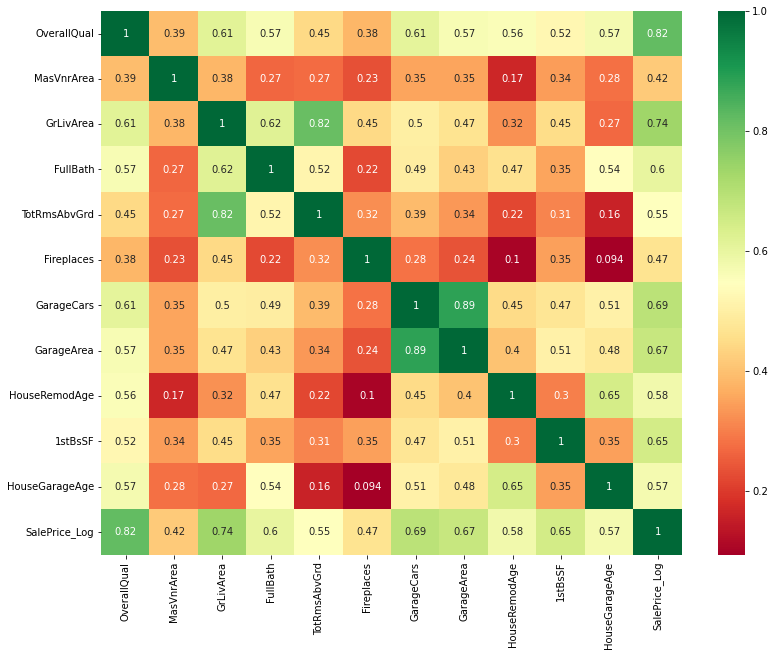

In [197]:
plt.figure(figsize=(13,10))
corr_heatmap = sns.heatmap(abs(df_train[high_corr_features].corr()),annot=True,cmap="RdYlGn")

In [198]:
df_train['GarageCars']

0       2
1       2
2       2
3       3
4       3
       ..
1342    2
1343    2
1344    1
1345    1
1346    1
Name: GarageCars, Length: 1347, dtype: int64

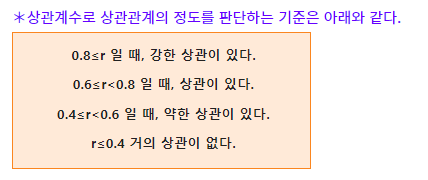

target과의 상관계수가 0.4 이상인 피처들을 뽑아서 heatmap으로 작성했다.  
위 hist plot에서 도출된 내용인 SalePrice와 비슷한 정규분포를 가진 피처들이 있는 것을 확인할 수 있다.  
수치형 변수는 해당 피처들로 모델링을 진행하면 좋은 성능을 발휘할 것으로 보인다.  
  
**특이 사항**  
상관계수 Histogram을 살펴보면서 새로운 사실을 알 수 있었는데, 위 상관계수를 보면 GarageCars와 GarageArea인 차량 수용 가능 차고 크기와 차고 평방 피트를 주목해보자.  
상식적으로 차량 수용 가능 차고 크기가 크면 차고 평방 피트가 크다. GarageCars와 GarageArea는 이 특징을 둘 다 가지고 있다.  
상관계수를 보면 0.88로 아주 높은 상관계수를 가지고 있다. 이것이 과연 좋은 값일까? (YearBuilt, GarageYrbit ...)  
<다중 공선성>에 따르면 독립변수 즉, target이 아닌 특징들에 대하여 서로 독립적인 관계여야 한다.
하지만 위 특징은 서로 독립적인 관계가 아니고 거의 하나로 움직이는데 주로 상관계수가 0.7이상일 때 다중 공선성이 나타난다고 한다.  
그러면 어떻게 해야할까?  
~~필자는 다중 공선성을 제거하기 위해 target과의 상관계수가 낮은 특징들을 제거하는 방법을 사용하면 된다고 생각한다.~~
~~그래도 피처들을 지우는 행위는 위험할 수도 있으니 잘 생각해보고 실행하자~~  
다중공선성을 보이는 변수들에 대한 처리를 자문을 구한 결과 크게 4가지로 나눠진다고 한다.  
1. 둘 중 타겟과의 상관계수가 낮은 변수 삭제
2. 다중공선성 변수들을 하나로 묶어서 처리(정확도가 떨어질수도 있음)
3. 더미기법 사용(범주형 데이터에 흔히 사용)
4. 다중공선성이 강하게 나타나는 변수중에 해당 독립변수가 영향을 매우 끼치는 변수면 그냥 두기

필자는 2/4번 방법을 사용할 예정이다.  
현재 상태
1. 1stFlrSF(0.59)-1층 평방피트 / TotalBsmtSF(0.63)-지하 총 평방피트  --------------> 0.79

2. GrLivArea(0.74)-지상 거실 면적 평방 피트 / TotRmsAbvGra(0.55)-지하층 위의 모든 방 (욕실 제외) -- 0.82

3. GarageAge(0.53)-차고 나이 / HouseAge(0.63)-건물 나이 ------> 0.82

4. GarageCars(0.69)-차량 수용 가능 차고 크기 / GarageArea(0.67)-차고 평방피트 ---->  0.88

1, 3은 두 변수의 합쳐서 새로운 변수를 만들고, 2와 4는 모든 변수가 유의미하다고 판단하여 그냥 둔다.
  
관련 자료 : 다중공선성 - https://learnx.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1Multicollinearity%EC%9D%B4%EB%9E%80

GarageCars와 GarageArea 중 낮은 상관계수를 가진 피처는 : **GarageArea**

YearBuilt와 GarageYrbit 중 낮은 상관계수를 가진 피처는 : **GarageYrbit**

In [187]:
# df_train.drop('GarageArea', axis = 1, inplace = True)
# df_train.drop('GarageYrbit', axis = 1, inplace = True)
# df_test.drop('GarageArea', axis = 1, inplace = True)
# df_test.drop('GarageYrbit', axis = 1, inplace = True) 

In [188]:
# # 1stFlrSF + TotalBsmtSF= 1stBsSF(1층 피트 + 지하 피트)
# df_train['1stBsSF'] = df_train['1stFlrSF'] + df_train['TotalBsmtSF'] 
# df_train.drop('1stFlrSF', axis = 1, inplace=True)
# df_train.drop('TotalBsmtSF', axis = 1, inplace=True)
# df_train.head()

In [189]:
# GarageAge + HouseAge = HouseGarageAge
# df_train['HouseGarageAge'] = df_train['GarageAge'] + df_train['HouseAge'] 
# df_train.drop('GarageAge', axis = 1, inplace=True)
# df_train.drop('HouseAge', axis = 1, inplace=True)
# df_train.head()

#### 범주형 변수 확인(nominal data, ordinal data 분리) - 명목 자료, 순서 자료로 분리해보기

범주형 데이터들과 각 범주들을 확인하는 작업 실행

In [200]:
# 수치형 피쳐와 카테고리형 피쳐가 얼마나 있고, 편의상 사용을 위하여 변수에 저장한다.
numerical_features = df_train.dtypes[df_train.dtypes != "object"]
print(f"수치형 변수 개수: {len(numerical_features.index)}개,\n수치형 변수: {numerical_features.index}")
print("--" * 50)
categorical_features = df_train.dtypes[df_train.dtypes == "object"]
print(f"범주형 변수 개수: {len(categorical_features.index)}개,\n범주형 변수: {categorical_features.index}")

수치형 변수 개수: 36개,
수치형 변수: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'HouseRemodAge', '1stBsSF', 'HouseGarageAge',
       'SalePrice_Log'],
      dtype='object')
----------------------------------------------------------------------------------------------------
범주형 변수 개수: 43개,
범주형 변수: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual

In [217]:
df_train['LotArea'].value_counts()

7200     24
9600     23
6000     17
9000     14
8400     13
         ..
9490      1
15578     1
5784      1
7879      1
9717      1
Name: LotArea, Length: 990, dtype: int64

In [218]:
for cate in list(categorical_features.index):
  print(df_train[cate].value_counts())
  print("--"*50)

RL         1062
RM          199
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
----------------------------------------------------------------------------------------------------
Pave    1344
Grvl       3
Name: Street, dtype: int64
----------------------------------------------------------------------------------------------------
None    1266
Grvl      42
Pave      39
Name: Alley, dtype: int64
----------------------------------------------------------------------------------------------------
Reg    865
IR1    443
IR2     32
IR3      7
Name: LotShape, dtype: int64
----------------------------------------------------------------------------------------------------
Lvl    1219
Bnk      52
HLS      48
Low      28
Name: LandContour, dtype: int64
----------------------------------------------------------------------------------------------------
AllPub    1347
Name: Utilities, dtype: int64
----------------------------------------------------------------------

### nominal_features와 ordinal_feature로 구분

In [219]:
nominal_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature', 'Electrical' , 'Functional'
]

ordinal_features = [
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'
]

#### nominal_features을 수치형 변수로 나타내기 위하여 더미 변수화 진행(one-hot encoding)
#### 기존 피처들을 삭제하고 더미 변수 추가

In [225]:
dummies = pd.get_dummies(df_train[nominal_features]).sort_index()
dummies

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,...,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,70,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1343,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1344,70,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1345,20,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [226]:
df_train = pd.concat([df_train, dummies], axis = 1)
df_train = df_train.drop(nominal_features, axis = 1)

In [227]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Columns: 229 entries, Id to Functional_Typ
dtypes: float64(4), int64(31), object(19), uint8(175)
memory usage: 798.6+ KB


In [228]:
df_train.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,1,65.0,8450,Reg,AllPub,Gtl,7,5,196.0,Gd,...,0,0,0,1,0,0,0,0,0,1
1,2,80.0,9600,Reg,AllPub,Gtl,6,8,0.0,TA,...,0,0,0,1,0,0,0,0,0,1
2,3,68.0,11250,IR1,AllPub,Gtl,7,5,162.0,Gd,...,0,0,0,1,0,0,0,0,0,1
3,4,60.0,9550,IR1,AllPub,Gtl,7,5,0.0,TA,...,0,0,0,1,0,0,0,0,0,1
4,5,84.0,14260,IR1,AllPub,Gtl,8,5,350.0,Gd,...,0,0,0,1,0,0,0,0,0,1


#### ordinary_features을 수치형 변수로 나타내기 위하여 서열로 인코딩
#### 기존 피처에서 replace

In [229]:
rating = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

ordinal_encoding = {
    'LotShape': {'None': 0, 'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 
    'Utilities': {'None': 0, 'ElO': 1, 'NoSeWa': 2, 'NoSeWr': 3, 'AllPub': 4}, 
    'LandSlope': {'None': 0, 'Gtl': 1, 'Mod': 2, 'Sev': 3}, 
    'ExterQual': rating, 
    'ExterCond': rating, 
    'BsmtQual': rating, 
    'BsmtCond': rating, 
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}, 
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
    'HeatingQC': rating, 
    'CentralAir': {'None': 0, 'N': 1, 'Y': 2}, 
    'Electrical': {'None': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}, 
    'KitchenQual': rating, 
    'Functional': {'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}, 
    'FireplaceQu': rating, 
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
    'GarageQual': rating, 
    'GarageCond': rating, 
    'PavedDrive': {'None': 0, 'N': 1, 'P': 2, 'Y': 3}, 
    'PoolQC': rating
}

In [230]:
df_train = df_train.replace(ordinal_encoding)

df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Columns: 229 entries, Id to Functional_Typ
dtypes: float64(4), int64(50), uint8(175)
memory usage: 798.6 KB


,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,1,65.0,8450,1,4,1,7,5,196.0,4,...,0,0,0,1,0,0,0,0,0,1
1,2,80.0,9600,1,4,1,6,8,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2,3,68.0,11250,2,4,1,7,5,162.0,4,...,0,0,0,1,0,0,0,0,0,1
3,4,60.0,9550,2,4,1,7,5,0.0,3,...,0,0,0,1,0,0,0,0,0,1
4,5,84.0,14260,2,4,1,8,5,350.0,4,...,0,0,0,1,0,0,0,0,0,1
